The following sections describe the standard types that are built into the interpreter.

## Truth Value Testing

Any object can be tested for truth value, for use in an `if` or `while` condition or as operand of the Boolean operations below

By default an object is considered true unless its class defines either a `__bool__()` method that returns `False` or a `__len__()` method that returns zero, when called with the object

* Constants defined to be false: `None` and `False`
* zero of any numeric type: `0, 0.0, 0j, Decimal(0), Fraction (0,1)`
* Empty sequence and collection: `''`, `()`, `[]`, `{}`, `set()`, `range()`

## Boolean Operation - and, or, not

| Operation   | Results                       | Notes |
| ----------- | ----------- ------------------|-------|
| `x or y`    | If x is false, then y, else x | (1)   |
| `x and y`   | if x is false then x, else y  | (2)   |
| `not x`     | if x is false, then `True`, else `False`| (3)|

1. This is a short circuit operator, so it only evalutes the second argument if the first one is false.
2. This is a short-circuit operator, so it only evaluates the second argument if the first one is true.
3. not has a lower priority than non-Boolean operators, so not a == b is interpreted as not (a == b), and a == not b is a syntax error.

## Comparisons
There are eight comparison operations in Python. They all have the same priority (which is higher than that of the Boolean operations)
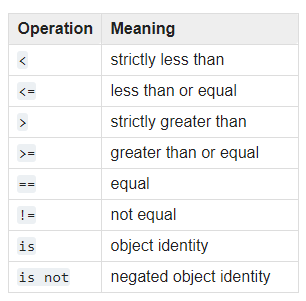

## Numeric Types - int, float, complex
There are three distinct numeric types: integers, floating point numbers, and complex numbers. In addition, Booleans are a subtype of integers. Integers have unlimited precision. Floating point numbers are usually implemented using double in C; information about the precision and internal representation of floating point numbers for the machine on which your program is running is available in `sys.float_info`. Complex numbers have a real and imaginary part, which are each a floating point number. To extract these parts from a complex number z, use `z.real` and `z.imag`.
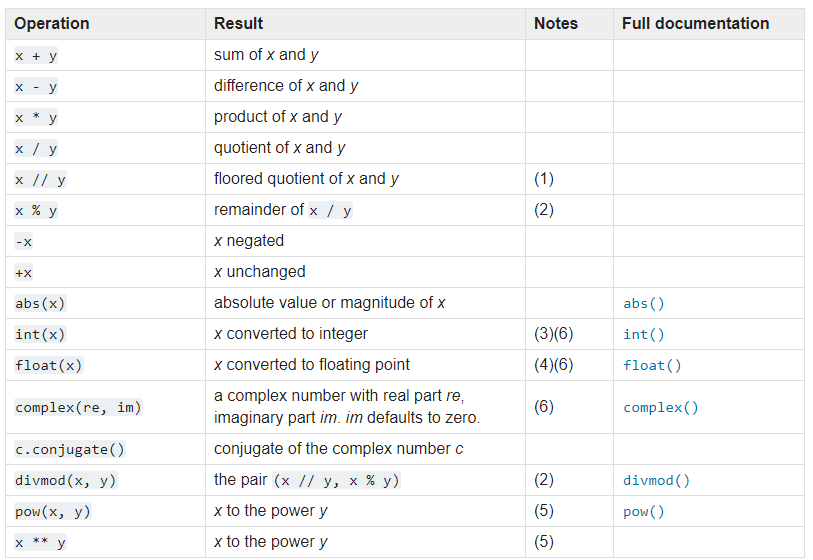

In [3]:
c = complex(10,20)
print(c)
print(c.real)
print(c.imag)
c.conjugate()

(10+20j)
10.0
20.0


(10-20j)

In [4]:
divmod(100,10)

(10, 0)

### Bitwise Operations on Integer Types
Bitwise operations only make sense for integers. The result of bitwise operations is calculated as though carried out in two’s complement with an infinite number of sign bits.

The priorities of the binary bitwise operations are all lower than the numeric operations and higher than the comparisons; the unary operation ~ has the same priority as the other unary numeric operations (+ and -).
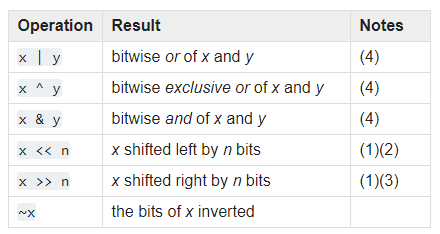

Notes:

1. Negative shift counts are illegal and cause a ValueError to be raised.

2. A left shift by n bits is equivalent to multiplication by pow(2, n).

3. A right shift by n bits is equivalent to floor division by pow(2, n).

4. Performing these calculations with at least one extra sign extension bit in a finite two’s complement representation (a working bit-width of 1 + max(x.bit_length(), y.bit_length()) or more) is sufficient to get the same result as if there were an infinite number of sign bits.

## Aditional Methods on Integer Types

In [2]:
## int.bit_length
n = -37
print(bin(n))
n.bit_length()

-0b100101


6

In [10]:
## int.to_bytes
print((1024).to_bytes(2,byteorder="big"))
print((1024).to_bytes(10,byteorder="big"))

b'\x04\x00'
b'\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00'


In [15]:
## int_from_bytes
# The argument bytes must either be a bytes-like object or an iterable producing bytes.
a = int.from_bytes(b'\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00', byteorder='big')
print(a)

1024


In [24]:
## int.as_integer_ration()
a = 450
b = 8
print(a.as_integer_ratio())
print(b.as_integer_ratio())

(450, 1)
(8, 1)


## Additional Methods on Float

In [23]:
## float.as_integer_ratio()
(20.5).as_integer_ratio()

(41, 2)

In [28]:
## float.is_integer

(10.251).is_integer()

False

In [36]:
## float.hex()
print(hex(10))
print((10.990818).hex())

0xa
0x1.5fb4c7f349386p+3


In [38]:
## float.fromhex()

float.fromhex('0x1.5fb4c7f349386p+3')

10.990818

## Iterator Types
Python supports a concept of iteration over containers. This is implemented using two distinct methods; these are used to allow user-defined classes to support iteration. Sequences, described below in more detail, always support the iteration methods.

`container.__iter__()` 
* Return an iterator object. The object is required to support the iterator protocol described below. If a container supports different types of iteration, additional methods can be provided to specifically request iterators for those iteration types.

_he iterator objects themselves are required to support the following two methods, which together form the iterator protocol_

`iterator.__iter__()`
* Return the iterator object itself. This is required to allow both containers and iterators to be used with the for and in statements.

`iterator.__next__()`
* Return the next item from the container. If there are no further items, raise the `StopIteration` exception.

## Generator 
Python’s generators provide a convenient way to implement the iterator protocol. If a container object’s __iter__() method is implemented as a generator, it will automatically return an iterator object (technically, a generator object) supplying the __iter__() and __next__() methods. More information about generators can be found in the documentation for the yield expression.

## Common Seqence Operations
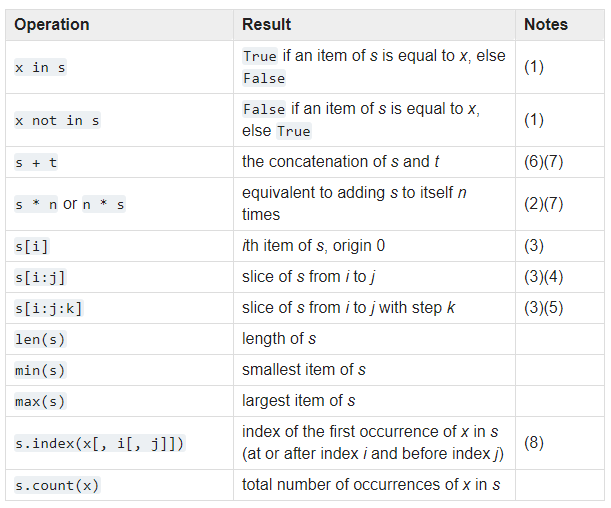

## Immutable Sequence Types

The only operation that immutable sequence types generally implement that is not also implemented by mutable sequence types is support for the hash() built-in.

This support allows immutable sequences, such as tuple instances, to be used as dict keys and stored in set and frozenset instances.

Attempting to hash an immutable sequence that contains unhashable values will result in TypeError.

## Mutable Sequence Types

The operations in the following table are defined on mutable sequence types. The collections.abc.MutableSequence ABC is provided to make it easier to correctly implement these operations on custom sequence types.

In the table s is an instance of a mutable sequence type, t is any iterable object and x is an arbitrary object that meets any type and value restrictions imposed by s (for example, bytearray only accepts integers that meet the value restriction 0 <= x <= 255).

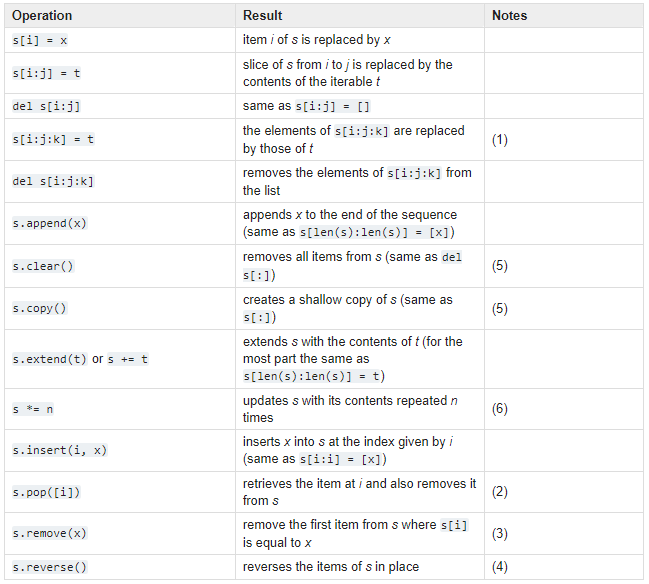

### Lists
Lists are mutable sequences, typically used to store collections of homogeneous items (where the precise degree of similarity will vary by application).

Lists may be constructed in several ways:

* Using a pair of square brackets to denote the empty list: []

* Using square brackets, separating items with commas: [a], [a, b, c]

* Using a list comprehension: [x for x in iterable]

* Using the type constructor: list() or list(iterable)

### Tuples
Tuples are immutable sequences, typically used to store collections of heterogeneous data (such as the 2-tuples produced by the enumerate() built-in). Tuples are also used for cases where an immutable sequence of homogeneous data is needed (such as allowing storage in a set or dict instance).

Tuples may be constructed in a number of ways:

* Using a pair of parentheses to denote the empty tuple: ()

* Using a trailing comma for a singleton tuple: a, or (a,)

* Separating items with commas: a, b, c or (a, b, c)

* Using the tuple() built-in: tuple() or tuple(iterable)

### Range
The range type represents an immutable sequence of numbers and is commonly used for looping a specific number of times in for loops.

### Text Sequence Type - str

Textual data in Python is handled with str objects, or strings. Strings are immutable sequences of Unicode code points. String literals are written in a variety of ways:

* Single quotes: `'allows embedded "double" quotes'`
* Double quotes: `"allows embedded 'single' quotes"`
* Triple quoted: `'''Three single quotes''', """Three double quotes"""`

## String Methods

In [46]:
# Return a copy of the string with its first character capitalized and the rest lowercased.
'hi subhadeep'.capitalize()

'Hi subhadeep'

In [47]:
# Return a casefolded copy of the string. Casefolded strings may be used for caseless matching.
'HI SUBHADEEP'.casefold()

'hi subhadeep'

In [57]:
# Return centered in a string of length width. Padding is done using the specified fillchar (default is an ASCII space). 
# The original string is returned if width is less than or equal to len(s).
'Hi subhadeep'.center(20, ' ')

'    Hi subhadeep    '

In [60]:
# Return the number of non-overlapping occurrences of substring sub in the range [start, end]. 
# Optional arguments start and end are interpreted as in slice notation.
'Hi subhadeep'.count('a')

1

In [61]:
# Return an encoded version of the string as a bytes object. Default encoding is 'utf-8'. 
# errors may be given to set a different error handling scheme. 
# The default for errors is 'strict', meaning that encoding errors raise a UnicodeError.
'Hi subhadeep'.encode(encoding="utf-8")

b'Hi subhadeep'

In [62]:
# Return True if the string ends with the specified suffix, otherwise return False.
'Hi subhadeep'.endswith('p')

True

In [68]:
# Return a copy of the string where all tab characters are replaced by one or more spaces, 
# depending on the current column and the given tab size
'Hi\tsubhadeep'.expandtabs(tabsize=5)

'Hi   subhadeep'

In [71]:
# Return the lowest index in the string where substring sub is found within the slice s[start:end]. 
'Hi subhadeep'.find('bha')

5

In [2]:
# Perform a string formatting operation. 
# The string on which this method is called can contain literal text or replacement fields delimited by braces {}.
print("Hi subhadeep {0} {1}".format("What's up", "Homei"))

Hi subhadeep What's up Homei


In [5]:
# Like find(), but raise ValueError when the substring is not found.
'Hi subhadeep'.index('s')

3

In [8]:
# returns true if all chars are alpha numeric
print('Hi subhadeep'.isalnum())
print("af89ea4f90fewf".isalnum())

False
True


In [13]:
# Return True if all characters in the string are alphabetic and there is at least one character, False otherwise.
print("Hi subhadeep".isalpha())

"sdfsaf".isalpha()

False


True

In [15]:
# Return True if all characters in the string are decimal characters and there is at least one character, False otherwise.
print('Hi subhadeep'.isdecimal())
print("452999".isdecimal())

False
True


In [18]:
# Return True if all characters in the string are digits and there is at least one character, False otherwise.
# Digits include decimal characters and digits that need special handling, such as the compatibility superscript digits.
print('Hi subhadeep'.isdigit())
print("452999".isdigit())

False
True


In [21]:
print('Hi subhadeep'.islower())
print('asa ara e'.islower())

False
True


In [23]:
# Return True if all characters in the string are numeric characters, and there is at least one character, False otherwise.
print('Hi subhadeep'.isnumeric())
print('48192 194'.isnumeric())
print('5991595'.isnumeric())

False
False
True


In [25]:
# Return True if all characters in the string are printable or the string is empty, False otherwise.
'wrwqer ewr ew'.isprintable()

True

In [27]:
# Return True if there are only whitespace characters in the string and there is at least one character, False otherwise.
print("wr'wq r'qwr' qw'rqw'e".isspace())
print("    ".isspace())

False
True


In [29]:
# Return True if the string is a titlecased string and there is at least one character, for example uppercase characters may only follow uncased characters and lowercase characters only cased ones. Return False otherwise.
print("Hey wassup".istitle())
print("Hey Whatsup".istitle())

False
True


In [30]:
# Return True if all cased character in the string are uppercase and there is at least one cased character, False otherwise.
print("HEY WHATS UP".isupper())

True


In [34]:
# join
names = ["Subhadeep", "Banerjee", "Beast", "Matrix"]
'*****'.join(names)

'Subhadeep*****Banerjee*****Beast*****Matrix'

In [36]:
# ljust
"Subhadeep".ljust(20)

'Subhadeep           '

In [37]:
# lower
print("HEY WHATS UP".lower())

hey whats up


In [50]:
# lstrip
"Subhadeep".lstrip('Subha')

'deep'

In [49]:
# partition
"Hey what's up nigga".partition('up')

("Hey what's ", 'up', ' nigga')

In [53]:
# removesprefix
'TestHook'.removeprefix('Test')

AttributeError: 'str' object has no attribute 'removeprefix'

In [54]:
'MiscTests'.removesuffix('Tests')

AttributeError: 'str' object has no attribute 'removesuffix'

In [55]:
# replace
'Hey I am subhadeep what are you doin'.replace('what are you doin', "What's up")

"Hey I am subhadeep What's up"

In [58]:
# Return the highest index in the string where substring sub is found, such that sub is contained within s[start:end]. 
"Subhadeep Banerjee".rfind("deep")

5

In [61]:
# Like rfind() but raises ValueError when the substring sub is not found.
"Subhadeep Banerjee".rindex("deep")

5

In [63]:
# Return the string right justified in a string of length width.
"Subhadeep Banerjee".rjust(20)

'  Subhadeep Banerjee'

In [65]:
# Split the string at the last occurrence of sep, and return a 3-tuple containing the part before the separator, 
# the separator itself, and the part after the separator.
"Subhadeep Banerjee".rpartition(" ")

('Subhadeep', ' ', 'Banerjee')

In [67]:
# rspllit
"Subhadeep Banerjee".rsplit("Ba")

['Subhadeep ', 'nerjee']

In [70]:
# rstrip
"     Subhadeep    ".rstrip()

'     Subhadeep'

In [71]:
'1,2,3,4,5,6'.split(',')

['1', '2', '3', '4', '5', '6']

In [73]:
# startwith
name= "Subhadeep"
if name.lower().startswith('s'):
    print("Yeah")
else:
    print("Nay")

Yeah


In [76]:
# strip
"****aerewr    ".strip('* ')

'aerewr'

In [79]:
# swapcase
print('Hello World'.title())
print('hello world'.title())

Hello World
Hello World


In [82]:
# translate

import tensorflow as tf
import torch

In [83]:
# upper()

'ewew ewr ew'.upper()

'EWEW EWR EW'

In [87]:
"42".zfill(12)

'000000000042'

## printf-style String Formatting
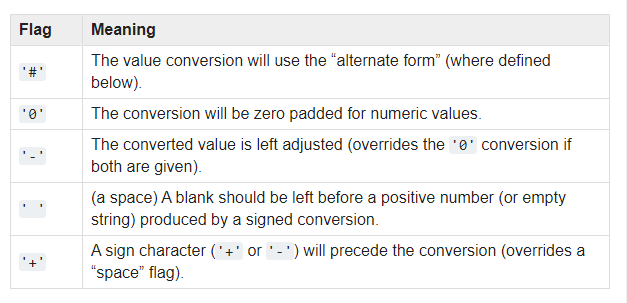

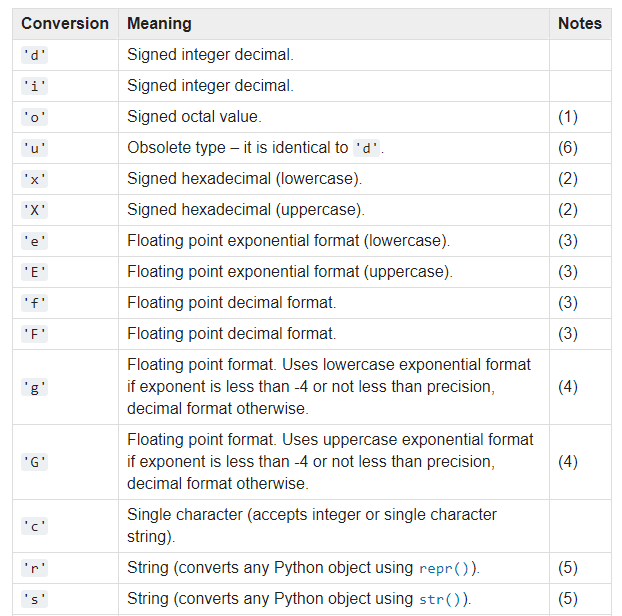

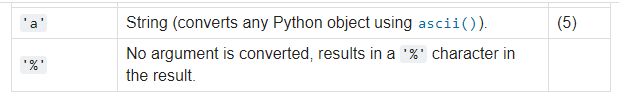

## Binary Sequence Types - bytes, bytearray, memoryview
Bytes objects are immutable sequences of single bytes. Since many major binary protocols are based on the ASCII text encoding, bytes objects offer several methods that are only valid when working with ASCII compatible data and are closely related to string objects in a variety of other ways.

In [4]:
## classmethod.fromhex
bytes.fromhex('2Ef0 F1f2')

b'.\xf0\xf1\xf2'

In [6]:
## hex
value = b'\xf0\xf1\xf2'
value.hex('-')

'f0-f1-f2'

### Bytearray Objects

In [8]:
# class bytearray()
bytearray.fromhex('2Ef0 F1f2')

bytearray(b'.\xf0\xf1\xf2')

In [9]:
# hex
bytearray(b'\xf0\xf1\xf2').hex()

'f0f1f2'

### Bytes and Bytearray Operations

In [13]:
a = "abc"
b = a.replace("a", "f")
print(b)

fbc


In [14]:
# bytes.count()

In [15]:
# bytes.removeprefix()
b'TestHook'.removeprefix(b'Test')

AttributeError: 'bytes' object has no attribute 'removeprefix'

### bytes has the same methods as string

* bytes.decode()
* endswith()
* find()
* index()
* join()
* maketrans()
* partition()
* replace()
* rfind()
* rindex()
* rpartition()
* startswith()
* translate()
* center()
* ljust()
* lstrip()
* rjust()
* rsplit()
* rstrip()
* split()
* strip()
* capitilize()
* expandtabs(tabsize=10)
* isalnum()
* isalpha()
* isascii()
* isdigit()
* islower()
* ispace()
* istitle()
* isupper()
* lower()
* splitlines()
* swapcase()
* title()
* upper()
* zfill()

In [16]:
## translate
b'read this short text'.translate(None, b'aeiou')

b'rd ths shrt txt'

In [17]:
# lstrip
b'   spacious   '.lstrip()

b'spacious   '

In [18]:
b'Subhadeep'.rjust(20)

b'           Subhadeep'

In [20]:
b'Subhadeep'.rsplit(b'd')

[b'Subha', b'eep']

In [21]:
b'   spacious   '.rstrip()

b'   spacious'

### printf-style Bytes Formatting
It is also same as strig operation

In [22]:
print(b'%(language)s has %(number)03d quote types.' % {b'language': b"Python", b"number": 2})

b'Python has 002 quote types.'


## Memory Views

Memoryview objects allow Python code to access the internal data of an object that supports the buffer protocol without copying..

#### class memoryview(obj) 
* Create a memoryview that references obj. obj must support the buffer protocol.
* Built in objects that support the buffer protocol include bytes and bytearray.

A memoryview supports slicing and indexing to expose it's data. One-dimensional Slicing will result in a subview:

In [31]:
v = memoryview(b'abcdefghij')
for i in range(0, 10):
    print(v[i])

97
98
99
100
101
102
103
104
105
106


In [34]:
print(v[-1])
print(v[1:4])
print(bytes(v[1:4]))

106
b'bcd'


## Python Buffer Protocol

The buffer protocol provides a way to access the internal data of an object. This internal data is a memory array or a buffer.

The buffer protocol allows one object to expose its internal data (buffers) and the other to access those buffers without intermediate copying.

This protocol is only accessible to us at the C-API level and not using our normal codebase.

So, in order to expose the same protocol to the normal Python codebase, memory views are present.

## What is a Memory View?
A memory view is a safe way to expose the buffer protocol in Python.

It allows you to access the internal buffers of an Object by Creating a memroy view object

## Why buffer protol and memory views are important?

We need to remember that whenever we proform some action on an object (call a function of an object, slice an array), python needs to create a copy of the object.

If we have a large data to work with (eg. binary data if an image), we would unnecessarily create copies of huge chunks of data, which serves almost no use.

Using the buffer protocol, we can give another object access to use/modify the large data without copying it. This makes the program use less memory and increases the execution speed.

In [39]:
data = bytearray(b'abcdef')
v = memoryview(data)
print(v.readonly)

False


In [41]:
v[0] = ord(b'z')
data

bytearray(b'zbcdef')

In [42]:
v[1:4] = b'123'

In [43]:
data

bytearray(b'z123ef')

In [45]:
a = "abcd"
print(id(a))
a = memoryview(b'abcd')
print(a[0])

1843319057328
97


In [46]:
...
...
...

## SetTypes - Set, frozenset

A set object is an unordered collection of distinct hashable objects. Common uses include membership testing, removing duplicates from a sequence, and computing mathematical operations such as intersection, union, difference, and symmetric difference. (For other containers see the built-in dict, list, and tuple classes, and the collections module.)

In [2]:
a = set({1,2,3,4,5})
print(a)
a.add(10)
print(a)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 10}


In [3]:
a = frozenset({1,2,3,4,5})
print(a)
a.add(10)
print(a)

frozenset({1, 2, 3, 4, 5})


AttributeError: 'frozenset' object has no attribute 'add'

### The methods in Sets and Frozenset is :-

* len(a)
* x in s
* x not in x
* isdisjoint(other)
* isubset(other)
* issuperset(other)
* union(*others)
* intersection(*others)
* isdisjoint(other)
* issubset(other)
* isisuperset(other)
* union(*others)
* intersection(*others)
* difference(*others)
* synnetric_difference(other)
* copy
* update(*others)
* intersection_update(*others)
* difference_update(*others)
* symmetric_difference_update(other)
* add(elem)
* remove(elem)
* discard(elem)
* pop()
* clear()

## Mapping Types - dict

A mapping object maps hashable values to arbitary objects. Mappings are utable objects. There is currently only one standard mapping type, the dictionary. (For other containers see the built-in list, set and tuple classes, and the collections module)

* class dict(**kwarg)
* class dict(mapping, **kwarg)
* class dict(iterable, **kwarg)

In [1]:
a = dict(one=1, two=2, three=3)
print(a)

{'one': 1, 'two': 2, 'three': 3}


In [2]:
len(a)

3

In [3]:
class Counter(dict):
    def __missing__(self, key):
        return 0
c = Counter()
c['red']
0
c['red'] += 1
c['red']

1

In [6]:
a["four"]=4
a

{'one': 1, 'two': 2, 'three': 3, 'four': 4}

In [7]:
del a["four"]

In [8]:
a

{'one': 1, 'two': 2, 'three': 3}

In [10]:
'one' in a

True

In [11]:
iter(a)

In [13]:
clear(a)

In [14]:
a

{'one': 1, 'two': 2, 'three': 3}

In [16]:
a.clear()

In [17]:
a

{}

## Context Manager Types

### ```contextmanager.__enter__()``` <br>
Enter the runtime context and return either this object or another object related to the runtime context. The value returned by this method is bound to the identifier in the as clause of with statenebts using this context manager
###  ```contextmanager.__exit__(exc_type, exc_val, exc_tb)```
Exit the runtime context and return a Boolean flag indicating if any exception that occurred should be suppressed. If an exception occurred while executing the body of the `with` statement, the arguments contain the exceoption type, value and traceback information otherwise, all three arguments `None`.

## Generic Alias Type (I do not understand this properly)
```GenericAlias``` objects are created by subscripting a class (usually a container), such as ```list[int]```. They are intended primarily for type annotations.

In [19]:
def average(values: list[float]) -> float:
    return sum(values) / len(values)

TypeError: 'type' object is not subscriptable